<a href="https://colab.research.google.com/github/OmniaAhmedemam/Uber-Data-Analysis/blob/main/Uber_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
File_path='/content/drive/MyDrive/Uber Request Data.csv'
Uber=pd.read_csv(File_path)
# Check the head of the dataframe
Uber.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [ ]:
Uber.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [ ]:
Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [ ]:
#check null
Uber.isnull().sum()

,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request timestamp,0
Drop timestamp,3914


In [ ]:
Uber[Uber['Driver id'].isnull()]['Status'].unique()
#  if no cars are available,a driver would not be assigned

array(['No Cars Available'], dtype=object)

In [ ]:
Uber[Uber['Drop timestamp'].isnull()]['Status'].unique()
# if a trip is not completed due to (no cars available or being cancelled), there would not be a drop timestamp

array(['Cancelled', 'No Cars Available'], dtype=object)

In [ ]:
# check for duplicates
Uber.duplicated().sum()

0

In [ ]:
# Changing Data Types
Uber['Request timestamp']=pd.to_datetime(Uber['Request timestamp'],format='mixed')
Uber['Drop timestamp']=pd.to_datetime(Uber['Drop timestamp'],format='mixed')




In [ ]:
# Adding Year, Month, Day
Uber['year'] = Uber['Request timestamp'].dt.year
Uber['month'] = Uber['Request timestamp'].dt.month
Uber['day'] = Uber['Request timestamp'].dt.day
# Extracting hour and day of week from Request timestamp
Uber['Request Hour']=Uber['Request timestamp'].dt.hour
Uber['Request Day']=Uber['Request timestamp'].dt.day_name()
# Add driver Status Columns to be "No Data" if Driver id = NaN
## Creating the Condition
condition = Uber['Driver id'].isnull() == True
## Applying the Condition to new column
Uber['Driver_Status'] = condition.apply(lambda x: 'No Data' if x else 'Valid')
Uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,year,month,day,Driver_Status,Request Hour,Request Day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016,11,7,Valid,11,Monday
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016,11,7,Valid,17,Monday
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016,12,7,Valid,9,Wednesday
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016,12,7,Valid,21,Wednesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,13,Valid,8,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,2016,7,15,No Data,23,Friday
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,2016,7,15,No Data,23,Friday
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,2016,7,15,No Data,23,Friday
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,2016,7,15,No Data,23,Friday


Business Question

In [ ]:
#Number of Trips for each Status

Uber['Status'].value_counts()

,count
Status,
Trip Completed,2831
No Cars Available,2650
Cancelled,1264


In [ ]:
# Assuming df is your DataFrame
status_counts = Uber['Status'].value_counts()
total_entries = len(Uber['Status'])

# Calculate percentages
status_percentages = (status_counts / total_entries) * 100

print(status_percentages)

Status
Trip Completed       41.971831
No Cars Available    39.288362
Cancelled            18.739807
Name: count, dtype: float64


Business Conclusion

- Only 42% of the total trips are completed.
- 39% of the trips are canceled due to lack in the cars availability.
- 18% of the trips are cancelled.

<ipython-input-18-d3d788b25561>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')


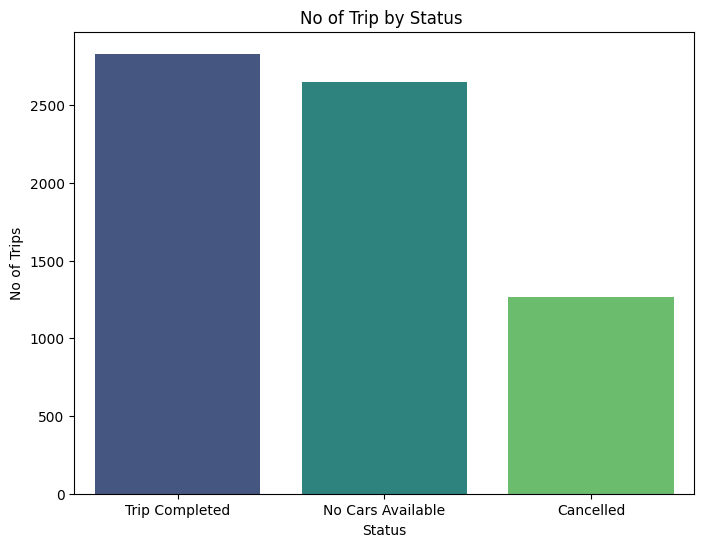

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')
plt.title('No of Trip by Status ')
plt.xlabel('Status')
plt.ylabel('No of Trips')
plt.show()

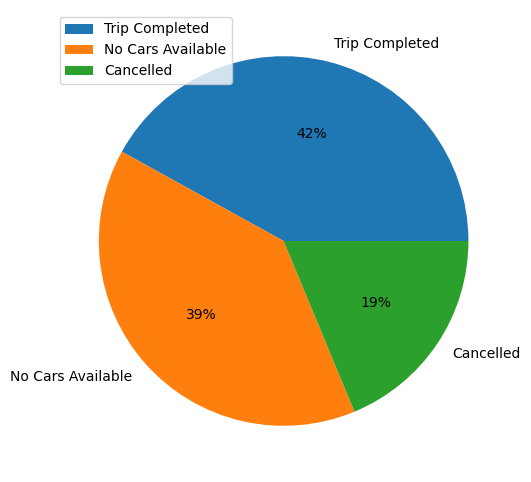

In [ ]:
plt.figure(figsize = (8,6))
plt.pie(status_counts,
        labels = status_counts.index,
        autopct='%1.0f%%'
        )
plt.legend(loc = 'upper left')

In [ ]:
#check the location of the 39% of the unavailable cars to focus on it.
# Show it as absolute values
cancelled_trips = Uber[Uber['Status'] == 'No Cars Available']
total_records = len(cancelled_trips['Status'])
pickup = cancelled_trips['Pickup point'].value_counts()

# Show it as percentages
percentage = (pickup/total_records) * 100
formatted_percentage = percentage.map("{:.0f}%".format)
formatted_percentage


,count
Pickup point,
Airport,65%
City,35%


Business Conclusion

- We can focus to make more cars available at the airport.


In [ ]:
check = pd.pivot_table(
    cancelled_trips,
    index = ['Status','month'],
    values = 'Request id',
    aggfunc = 'count'
)

# Reset index to convert it into normal columns
check = check.reset_index()
check

,Status,month,Request id
0,No Cars Available,7,1641
1,No Cars Available,11,504
2,No Cars Available,12,505


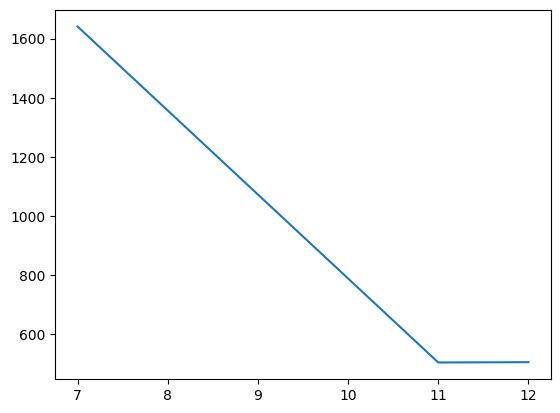

In [ ]:
# Draw the line chart

plt.plot(
    check['month'],
    check['Request id']
)

In [ ]:
test = pd.pivot_table(
    Uber,
    index = ['Status','month'],
    values = 'Request id',
    aggfunc = 'count'
)

# Reset index to convert it into normal columns
test = test.reset_index()

test

,Status,month,Request id
0,Cancelled,7,762
1,Cancelled,11,262
2,Cancelled,12,240
3,No Cars Available,7,1641
4,No Cars Available,11,504
5,No Cars Available,12,505
6,Trip Completed,7,1668
7,Trip Completed,11,601
8,Trip Completed,12,562


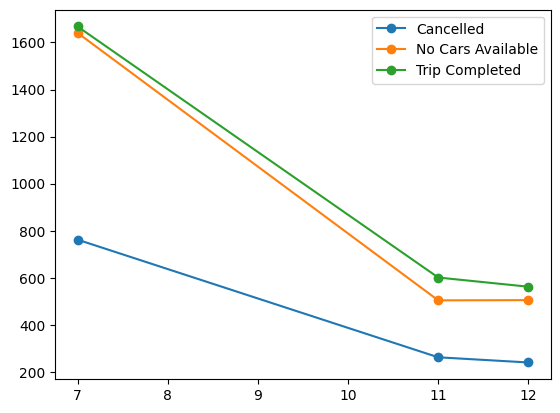

In [ ]:
# Using Matplotlib

# Initialize an empty list to store labels
labels = []

for status in test['Status'].unique():
  plt.plot(
      test[test['Status'] == status]['month'],
      test[test['Status'] == status]['Request id'],
      marker = 'o'
  )
  labels.append(status)

plt.legend(labels)

<Axes: ylabel='count'>

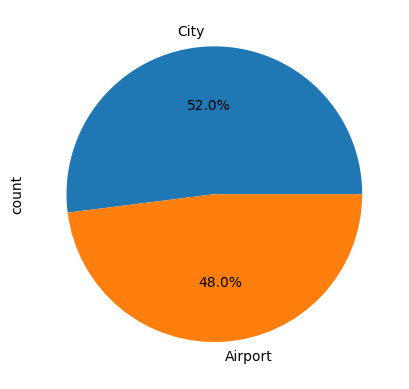

In [ ]:
#  What is the distribution of requests based on pickup points

(Uber['Pickup point'].value_counts()/Uber.shape[0]*100).plot.pie(autopct="%1.1f%%")

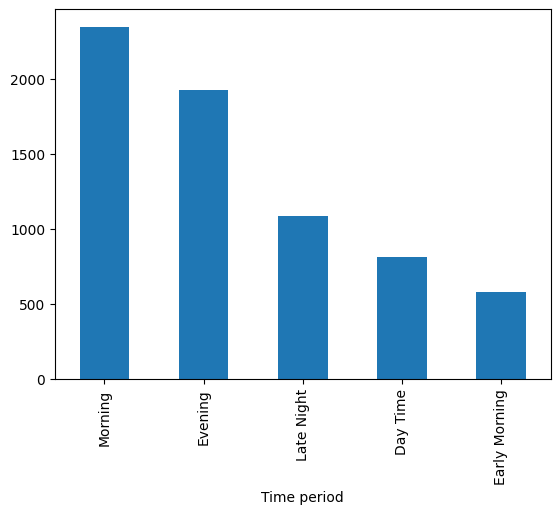

In [ ]:
#  At any time of the day the number of requests increases


#EARLY_MORNING = Midnight to 5AM

#MORNING = 5AM to 11AM

#Afternoon = 12AM to 5PM

#EVENING = 6PM to 10PM

#LATE NIGHT = 11PM TO Midnight


def time_period(x):
    if x < 5:
        return "Early Morning"
    elif 5 <= x < 11:
        return "Morning"
    elif 12 <= x < 17:
        return "Day Time"
    elif 18<= x < 22:
        return "Evening"
    else:
        return "Late Night"
Uber['Time period'] = Uber['Request Hour'].apply(lambda x: time_period(x))
Uber['Time period'].value_counts()
Uber['Time period'].value_counts().plot.bar()
plt.show()

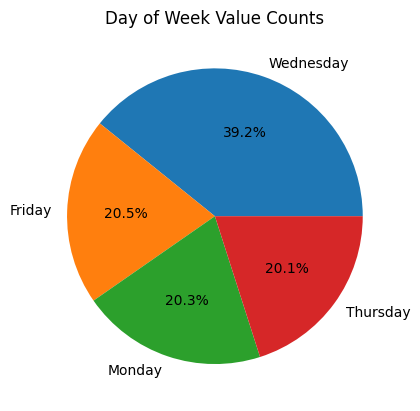

In [ ]:
#  What is the day with the highest number of requests

day_counts = Uber['Request Day'].value_counts()

# Create a pie chart of the value counts
plt.pie(day_counts.values, labels=day_counts.index, autopct='%1.1f%%')
plt.title('Day of Week Value Counts')
plt.show()


<ipython-input-28-e539c2d71fea>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellations_by_hour.index, y=cancellations_by_hour.values, palette='viridis')


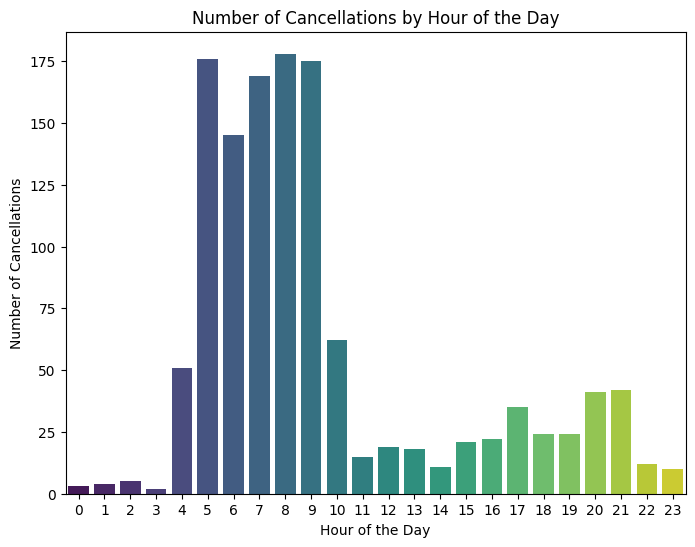

In [ ]:
#  Are there specific time when cancellation are more frequent
cancellations_by_hour = Uber[Uber['Status'] == 'Cancelled']['Request Hour'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=cancellations_by_hour.index, y=cancellations_by_hour.values, palette='viridis')
plt.title('Number of Cancellations by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Cancellations')
plt.show()



<ipython-input-29-ac2073ec2169>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellations_by_day.index, y=cancellations_by_day.values, palette='viridis')


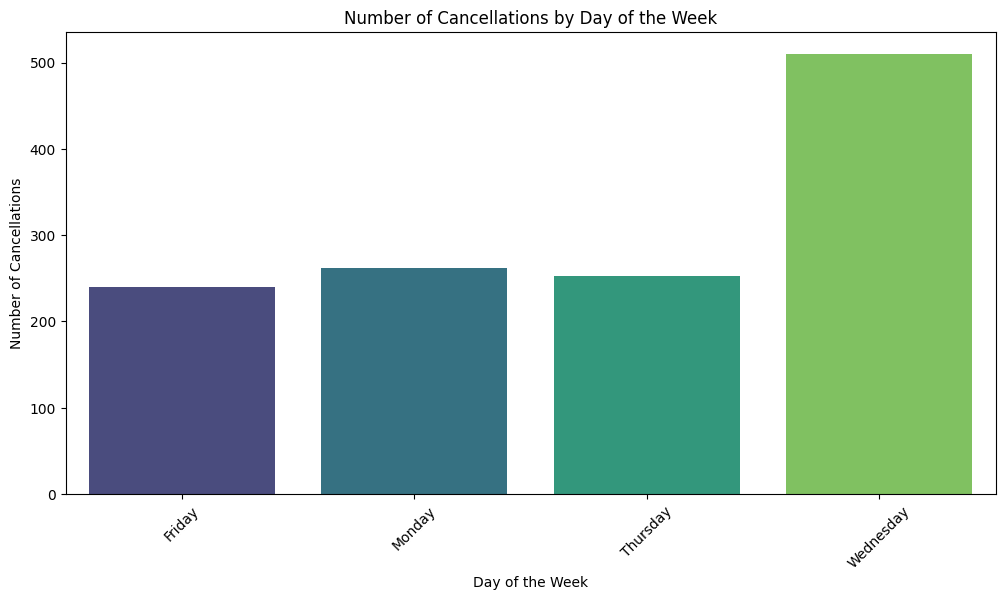

In [ ]:
#  Are there specific days of weeks with higher cancellation

cancelled_data = Uber[Uber['Status'] == 'Cancelled']
cancellations_by_day = cancelled_data['Request Day'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=cancellations_by_day.index, y=cancellations_by_day.values, palette='viridis')
plt.title('Number of Cancellations by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.show()


In [ ]:
Uber.to_csv('/content/drive/MyDrive/Uber Request Data.csv',index=False)